In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [1]:
from sklearn.utils import shuffle
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [4]:
from sklearn.utils import shuffle
import numpy as np
from numpy import genfromtxt
X=np.zeros((847,1,8000))
Y=np.zeros((847,2))


for i in range(847):
  my_data = genfromtxt("C:/Users/dianu/Downloads/SM/SM_Gen/SM"+str(i+1)+".csv", delimiter=',')
  my_data2 = genfromtxt("C:/Users/dianu/Downloads/SMy/SM_id_Gen/SMy"+str(i+1)+".csv", delimiter=',')
  X[i,0,:]=my_data
  Y[i,:]=my_data2

In [5]:
X, Y = shuffle(X, Y)

In [6]:
# Split the dataset
split_train = int(len(X)*0.7)
split_valid = int(len(X)*0.9)

# Train

X_train = X[:split_train, [0],:]; y_train=Y[:split_train, :]

# Valid

X_valid = X[split_train:split_valid, [0],:]; y_valid=Y[split_train:split_valid,:]

# Test

X_test = X[split_valid:, [0],:]; y_test=Y[split_valid:,:]

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(592, 1, 8000) (592, 2)
(170, 1, 8000) (170, 2)
(85, 1, 8000) (85, 2)


In [2]:
model = Sequential()


model.add(SimpleRNN(128, return_sequences=True, input_shape=(1,8000)))
model.add(SimpleRNN(128, return_sequences=True))
model.add(SimpleRNN(128, return_sequences=True))
model.add(SimpleRNN(128))
model.add(Dense(2))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 1, 128)            1040512   
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 1, 128)            32896     
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 1, 128)            32896     
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 128)               32896     
_________________________________________________________________
dense (Dense)                (None, 2)                 258       
Total params: 1,139,458
Trainable params: 1,139,458
Non-trainable params: 0
_________________________________________________________________


In [8]:
optimizer = keras.optimizers.Adam(learning_rate=0.003)
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['acc'])

history=model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2,validation_data=(X_valid, y_valid))

Epoch 1/100
592/592 - 73s - loss: 1.5101 - acc: 0.8176 - val_loss: 1.0194 - val_acc: 0.8471
Epoch 2/100
592/592 - 21s - loss: 0.8910 - acc: 0.8480 - val_loss: 1.1257 - val_acc: 0.8647
Epoch 3/100
592/592 - 21s - loss: 0.8327 - acc: 0.8497 - val_loss: 0.7893 - val_acc: 0.8412
Epoch 4/100
592/592 - 21s - loss: 0.8092 - acc: 0.8547 - val_loss: 0.7881 - val_acc: 0.8529
Epoch 5/100
592/592 - 21s - loss: 0.7903 - acc: 0.8497 - val_loss: 0.7315 - val_acc: 0.8647
Epoch 6/100
592/592 - 21s - loss: 0.7521 - acc: 0.8463 - val_loss: 0.8371 - val_acc: 0.8941
Epoch 7/100
592/592 - 21s - loss: 0.7244 - acc: 0.8463 - val_loss: 0.9777 - val_acc: 0.7941
Epoch 8/100
592/592 - 21s - loss: 0.7628 - acc: 0.8514 - val_loss: 0.7404 - val_acc: 0.8765
Epoch 9/100
592/592 - 21s - loss: 0.6677 - acc: 0.8666 - val_loss: 0.7565 - val_acc: 0.8647
Epoch 10/100
592/592 - 11s - loss: 0.6669 - acc: 0.8649 - val_loss: 0.7265 - val_acc: 0.8824
Epoch 11/100
592/592 - 16s - loss: 0.6901 - acc: 0.8716 - val_loss: 0.6530 - va

Epoch 90/100
592/592 - 8s - loss: 0.2639 - acc: 0.9071 - val_loss: 0.5395 - val_acc: 0.8941
Epoch 91/100
592/592 - 8s - loss: 0.2749 - acc: 0.8970 - val_loss: 0.4670 - val_acc: 0.9294
Epoch 92/100
592/592 - 8s - loss: 0.2705 - acc: 0.8970 - val_loss: 0.4606 - val_acc: 0.9059
Epoch 93/100
592/592 - 8s - loss: 0.2588 - acc: 0.9054 - val_loss: 0.5355 - val_acc: 0.9412
Epoch 94/100
592/592 - 8s - loss: 0.2526 - acc: 0.9071 - val_loss: 0.3909 - val_acc: 0.9294
Epoch 95/100
592/592 - 8s - loss: 0.2416 - acc: 0.9240 - val_loss: 0.5061 - val_acc: 0.9353
Epoch 96/100
592/592 - 8s - loss: 0.2246 - acc: 0.9358 - val_loss: 0.4439 - val_acc: 0.9353
Epoch 97/100
592/592 - 8s - loss: 0.2448 - acc: 0.9257 - val_loss: 0.4978 - val_acc: 0.9235
Epoch 98/100
592/592 - 8s - loss: 0.2517 - acc: 0.9307 - val_loss: 0.4651 - val_acc: 0.9353
Epoch 99/100
592/592 - 8s - loss: 0.2674 - acc: 0.9307 - val_loss: 0.4548 - val_acc: 0.9118
Epoch 100/100
592/592 - 8s - loss: 0.2629 - acc: 0.9122 - val_loss: 0.4020 - val

Text(0.5, 1.0, 'Training and validation loss')

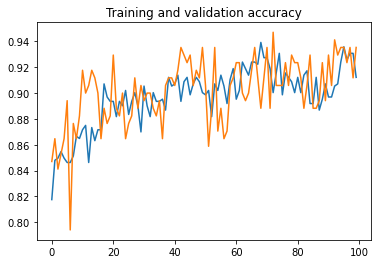

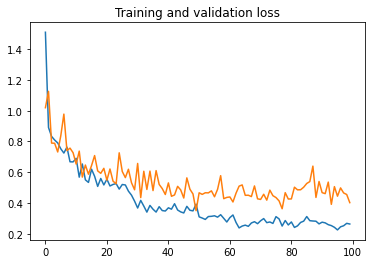

In [9]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [10]:
y_predictim=model.predict(X_test)

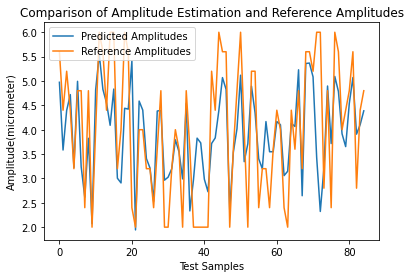

In [11]:
plt.plot(y_predictim[:,0],label="Predicted Amplitudes")
plt.plot(y_test[:,0],label="Reference Amplitudes")
plt.legend(loc="upper left")
plt.xlabel('Test Samples')
plt.ylabel('Amplitude(micrometer)')
plt.title('Comparison of Amplitude Estimation and Reference Amplitudes')
plt.show()

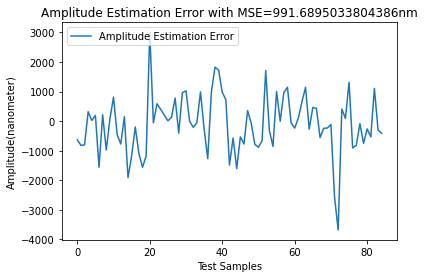

In [12]:
from sklearn.metrics import mean_squared_error
plt.plot(1000*(y_predictim[:,0]-y_test[:,0]),label="Amplitude Estimation Error")
plt.legend(loc="upper left")
plt.xlabel('Test Samples')
plt.ylabel('Amplitude(nanometer)')
plt.title('Amplitude Estimation Error with MSE='+str(1000*mean_squared_error(y_predictim[:,0], y_test[:,0]))+'nm')
plt.show()

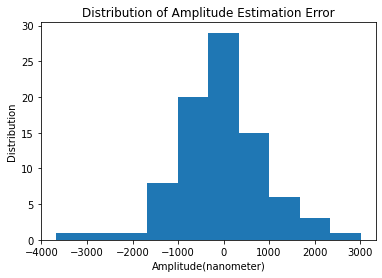

In [13]:
plt.hist(1000*(y_predictim[:,0]-y_test[:,0]), bins = 10)
plt.xlabel('Amplitude(nanometer)')
plt.ylabel('Distribution')
plt.title('Distribution of Amplitude Estimation Error')
plt.show()

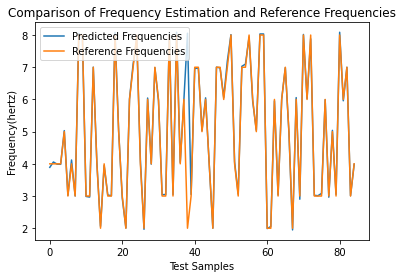

In [14]:
plt.plot(y_predictim[:,1],label="Predicted Frequencies")
plt.plot(y_test[:,1],label="Reference Frequencies")
plt.legend(loc="upper left")
plt.xlabel('Test Samples')
plt.ylabel('Frequency(hertz)')
plt.title('Comparison of Frequency Estimation and Reference Frequencies')
plt.show()

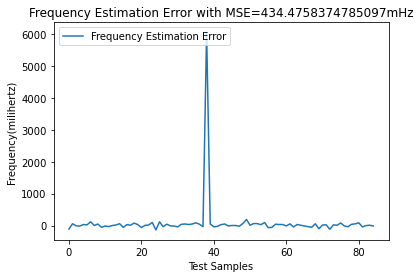

In [15]:
plt.plot(1000*(y_predictim[:,1]-y_test[:,1]),label="Frequency Estimation Error")
plt.legend(loc="upper left")
plt.xlabel('Test Samples')
plt.ylabel('Frequency(milihertz)')
plt.title('Frequency Estimation Error with MSE='+str(1000*mean_squared_error(y_predictim[:,1], y_test[:,1]))+'mHz')
plt.show()

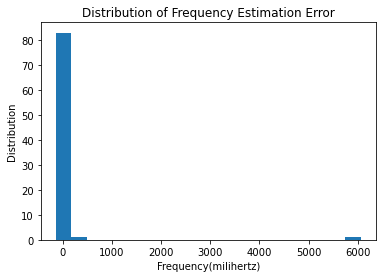

In [16]:
plt.hist(1000*(y_predictim[:,1]-y_test[:,1]), bins = 20)
plt.xlabel('Frequency(milihertz)')
plt.ylabel('Distribution')
plt.title('Distribution of Frequency Estimation Error')
plt.show()